In [191]:
# pip install pandas numpy matplotlib seaborn scikit-learn sentence_transformers xgboost lightgbm 

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge

In [193]:
df = pd.read_csv("data.csv")

In [194]:
df.shape

(2514, 15)

In [195]:
df.columns

Index(['review_id', 'user_id', 'app_name', 'app_category', 'review_text',
       'review_language', 'rating', 'review_date', 'verified_purchase',
       'device_type', 'num_helpful_votes', 'user_age', 'user_country',
       'user_gender', 'app_version'],
      dtype='object')

In [196]:
df.head()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


review_language
da    3.249038
es    3.195763
fr    3.176404
tl    3.122124
ru    3.116418
hi    3.115385
ko    3.076316
ar    3.073077
de    3.062626
en    3.060204
vi    3.050000
th    3.040426
it    3.025510
no    3.023000
fi    2.986486
nl    2.965217
ms    2.965116
id    2.964545
sv    2.922449
tr    2.906931
ja    2.873913
pt    2.839560
zh    2.833333
pl    2.810744
Name: rating, dtype: float64


/tmp/ipykernel_5371/3591630149.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_ratings.index, y=lang_ratings.values, palette="viridis")


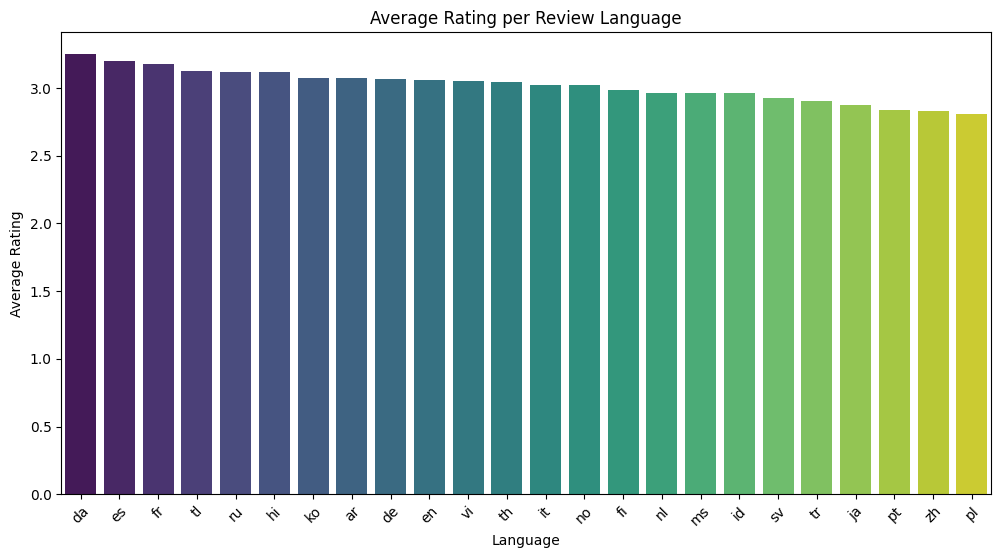

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by language and calculate mean rating
lang_ratings = df.groupby("review_language")["rating"].mean().sort_values(ascending=False)

print(lang_ratings)  # optional: to see values

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=lang_ratings.index, y=lang_ratings.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Rating per Review Language")
plt.ylabel("Average Rating")
plt.xlabel("Language")
plt.show()


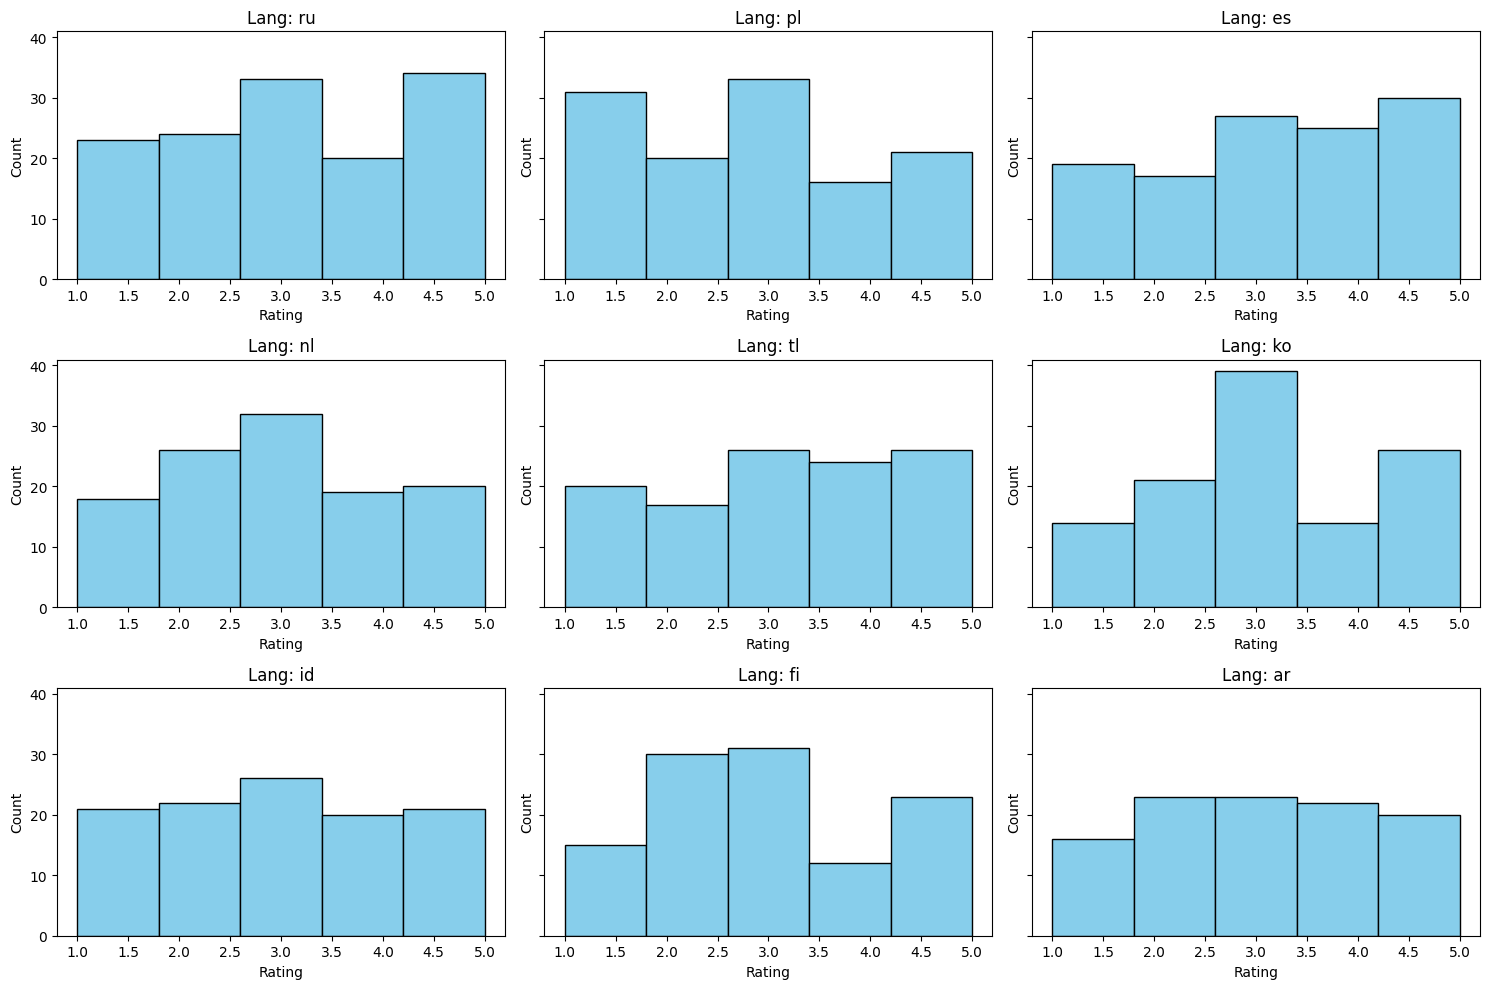

In [198]:
import matplotlib.pyplot as plt

# Select top N languages (optional, to keep it readable)
top_langs = df["review_language"].value_counts().head(9).index
df_top = df[df["review_language"].isin(top_langs)]

# Create subplots
n = len(top_langs)
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharey=True)

for i, lang in enumerate(top_langs):
    ax = axes[i // cols, i % cols]
    subset = df_top[df_top["review_language"] == lang]
    
    ax.hist(subset["rating"], bins=5, range=(1,5), color="skyblue", edgecolor="black")
    ax.set_title(f"Lang: {lang}")
    ax.set_xlabel("Rating")
    ax.set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


### Rating distributions by language
The histograms show how ratings vary across different languages.  Some languages (e.g., **ru, es**) have more positive skew with higher ratings,  
while others (e.g., **ko, fi**) show a stronger concentration around the middle values (≈3).  This suggests cultural or dataset differences in rating tendencies.


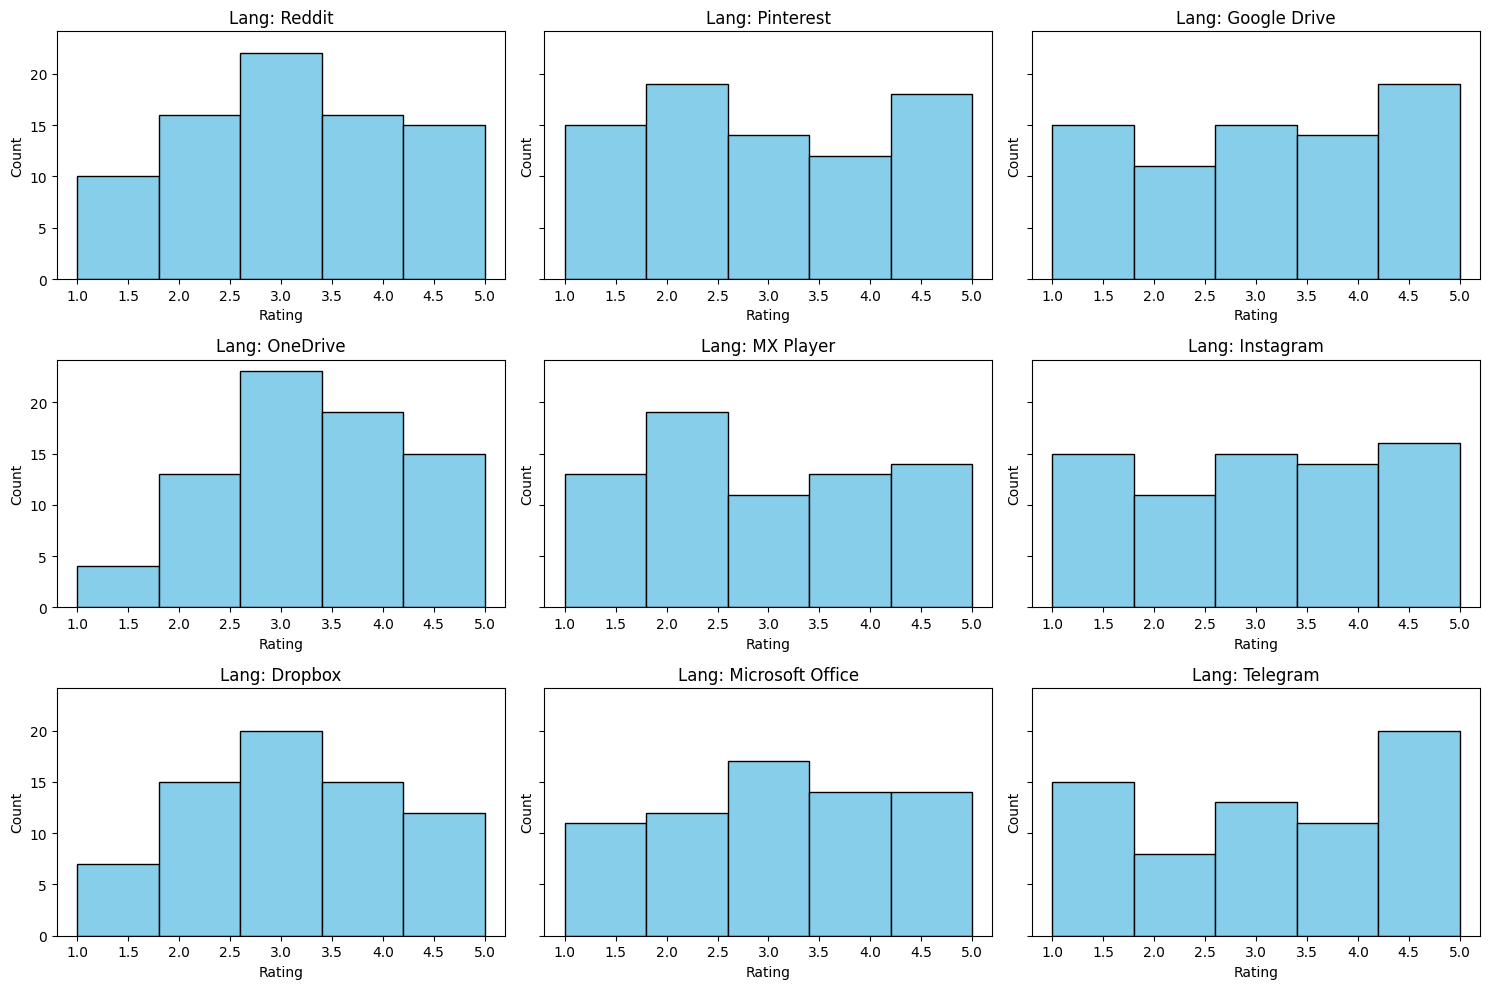

In [199]:
import matplotlib.pyplot as plt

# Select top N languages (optional, to keep it readable)
top_langs = df["app_name"].value_counts().head(9).index
df_top = df[df["app_name"].isin(top_langs)]

# Create subplots
n = len(top_langs)
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharey=True)

for i, lang in enumerate(top_langs):
    ax = axes[i // cols, i % cols]
    subset = df_top[df_top["app_name"] == lang]
    
    ax.hist(subset["rating"], bins=5, range=(1,5), color="skyblue", edgecolor="black")
    ax.set_title(f"Lang: {lang}")
    ax.set_xlabel("Rating")
    ax.set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


### Rating distributions by language groups
The plots show different rating patterns across numeric language groups.  Some (e.g., **21, 24**) lean toward mid-range ratings, while others (e.g., **11, 28**) show stronger peaks at high ratings.  This highlights variation in how different groups use the rating scale.


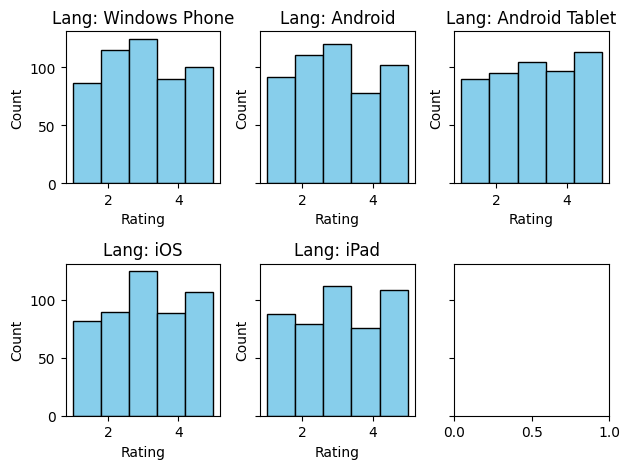

In [200]:
import matplotlib.pyplot as plt

# Select top N languages (optional, to keep it readable)
top_langs = df["device_type"].value_counts().head(9).index
df_top = df[df["device_type"].isin(top_langs)]

# Create subplots
n = len(top_langs)
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, sharey=True)

for i, lang in enumerate(top_langs):
    ax = axes[i // cols, i % cols]
    subset = df_top[df_top["device_type"] == lang]
    
    ax.hist(subset["rating"], bins=5, range=(1,5), color="skyblue", edgecolor="black")
    ax.set_title(f"Lang: {lang}")
    ax.set_xlabel("Rating")
    ax.set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


### Rating distributions (Lang 0–4)
Across these groups, ratings are fairly balanced, with most histograms showing peaks around 2–3 and noticeable counts at the extremes (1 and 5).  
This suggests a wide range of user opinions, without a strong bias toward only positive or negative ratings.


In [201]:
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ["<18", "18-25", "26-35", "36-50", "51-65", "65+"]
df["age_group"] = pd.cut(df["user_age"], bins=bins, labels=labels)

group_rating = df.groupby("age_group")["rating"].mean()

print(group_rating.sort_values(ascending=False))


age_group
51-65    3.075083
18-25    3.066894
65+      3.027670
<18      2.989954
26-35    2.979052
36-50    2.975455
Name: rating, dtype: float64


/tmp/ipykernel_5371/4029746090.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_rating = df.groupby("age_group")["rating"].mean()


### Average rating by age group
The mean ratings are fairly close across all age groups (≈3.0).  Slightly higher averages are seen for **51–65** and **18–25**, while **36–50** shows the lowest.  
Overall, age does not appear to strongly influence rating tendencies.


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   review_id          2514 non-null   int64   
 1   user_id            2514 non-null   int64   
 2   app_name           2514 non-null   object  
 3   app_category       2514 non-null   object  
 4   review_text        2455 non-null   object  
 5   review_language    2514 non-null   object  
 6   rating             2477 non-null   float64 
 7   review_date        2514 non-null   object  
 8   verified_purchase  2514 non-null   bool    
 9   device_type        2514 non-null   object  
 10  num_helpful_votes  2514 non-null   int64   
 11  user_age           2514 non-null   float64 
 12  user_country       2473 non-null   object  
 13  user_gender        1927 non-null   object  
 14  app_version        2484 non-null   object  
 15  age_group          2514 non-null   category
dtypes: boo

### Dataset overview
The dataset contains **2,514 entries** with 14 columns.  It includes numeric identifiers (e.g., app, category, device, country), text (`review_text`), categorical (`age_group`), and target (`rating`).  Most fields are complete, with only `review_text` having some missing values.


In [203]:
df.nunique()

review_id            2514
user_id              2514
app_name               41
app_category           18
review_text           739
review_language        24
rating                 41
review_date          2514
verified_purchase       2
device_type             5
num_helpful_votes    1078
user_age               63
user_country           24
user_gender             4
app_version          2081
age_group               6
dtype: int64

In [204]:
df["app_name"].unique()

array(['MX Player', 'Tinder', 'Netflix', 'Venmo', 'Google Drive',
       'Signal', 'Canva', 'Microsoft Office', 'Dropbox', 'Coursera',
       'Adobe Photoshop', 'Udemy', 'eBay', 'Khan Academy', 'Snapchat',
       'Facebook', 'LinkedIn', 'PayPal', 'Google Maps', 'Booking.com',
       'Zoom', 'Reddit', 'Duolingo', 'YouTube', 'Waze', 'Discord',
       'Instagram', 'Spotify', 'OneDrive', 'VLC', 'Amazon', 'Pinterest',
       'Bumble', 'Uber', 'Airbnb', 'Grammarly', 'Lyft', 'Telegram',
       'WhatsApp', 'Twitter', 'TikTok'], dtype=object)

In [205]:
df = df.drop(columns=["review_id", "user_id"])

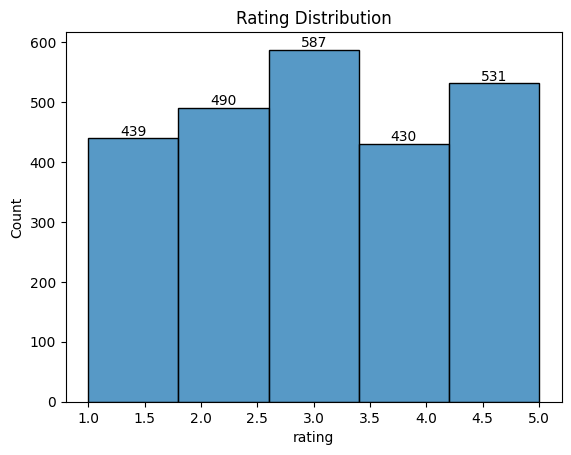

In [206]:
ax = sns.histplot(df["rating"], bins=5, kde=False)
plt.title("Rating Distribution")

# Add counts above bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [207]:
df.isna().sum()

app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
age_group              0
dtype: int64

In [208]:
df = df.fillna(df.median(numeric_only=True))

In [209]:
# Encode categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns.drop("review_text")
le = LabelEncoder()
for col in cat_cols:
    df[col] = df[col].astype(str).fillna("missing")
    df[col] = le.fit_transform(df[col])

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   app_name           2514 non-null   int64   
 1   app_category       2514 non-null   int64   
 2   review_text        2455 non-null   object  
 3   review_language    2514 non-null   int64   
 4   rating             2514 non-null   float64 
 5   review_date        2514 non-null   int64   
 6   verified_purchase  2514 non-null   bool    
 7   device_type        2514 non-null   int64   
 8   num_helpful_votes  2514 non-null   int64   
 9   user_age           2514 non-null   float64 
 10  user_country       2514 non-null   int64   
 11  user_gender        2514 non-null   int64   
 12  app_version        2514 non-null   int64   
 13  age_group          2514 non-null   category
dtypes: bool(1), category(1), float64(2), int64(9), object(1)
memory usage: 240.9+ KB


In [211]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")
df = df.dropna(subset=["review_text"])
embeddings = model.encode(df["review_text"].fillna("").tolist())
df = df.fillna(df.median(numeric_only=True))
X = np.hstack([embeddings, df.drop(columns=["rating", "age_group", "review_text"])]) 


In [212]:
print(embeddings.shape)

(2455, 384)


In [213]:
embeddings.shape

(2455, 384)

In [214]:
import numpy as np

df = df.fillna(df.median(numeric_only=True))
X = np.hstack([embeddings, df.drop(columns=["rating", "age_group", "review_text"])]) 

In [215]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [216]:
scaler = StandardScaler()
PCA_num = df.select_dtypes(include=["int64","float64"])
X_scaled = scaler.fit_transform(PCA_num)

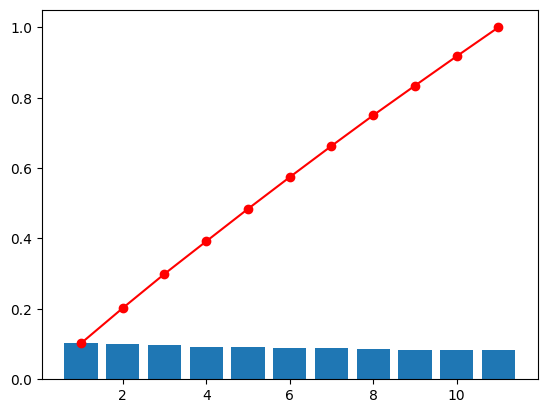

In [217]:
pca = PCA()
pca_result = pca.fit_transform(X_scaled)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), 'ro-')

### PCA explained variance
The bars show the variance explained by each principal component.  The red line is the cumulative variance, indicating how much of the total variance is captured as components are added.




In [218]:
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# External libraries (install if needed: pip install lightgbm xgboost)
from lightgbm import LGBMRegressor
from xgboost  import XGBRegressor

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "SVR": SVR(kernel="rbf", C=1.0, epsilon=0.2),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "LightGBM": LGBMRegressor(n_estimators=500, learning_rate=0.05, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = root_mean_squared_error(y_test, preds)
    results[name] = {"MAE": mae, "RMSE": rmse}

pd.DataFrame(results).T

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96078
[LightGBM] [Info] Number of data points in the train set: 1964, number of used features: 395
[LightGBM] [Info] Start training from score 2.994348


/home/calin/Projects/Sigmoid/exam/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,MAE,RMSE
LinearRegression,1.073975,1.319003
Ridge,0.966010,1.146390
RandomForest,0.972212,1.153564
SVR,0.950040,1.129657
KNN,1.022892,1.218816
LightGBM,1.023777,1.228252
XGBoost,1.027536,1.230837


In [220]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# --- data ---
X = np.array(X, dtype=np.float32)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)  # keep order

# --- model ---
class RatingRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

model = RatingRegressor(input_dim=X.shape[1])
criterion = nn.HuberLoss(delta=1.0)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

# --- train ---
epochs = 20
for epoch in range(epochs):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()

    # --- validate ---
    model.eval()
    y_true_list, y_pred_list = [], []
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            val_loss += criterion(preds, yb).item()
            # collect values
            y_true_list.extend(yb.cpu().numpy().ravel())
            y_pred_list.extend(preds.cpu().numpy().ravel())

    val_loss /= len(val_loader)
    print(f"Epoch {epoch+1}/{epochs}, Val RMSE: {val_loss**0.5:.4f}")

# --- dataframe with diffs (on validation set) ---
results_df = pd.DataFrame({
    "y_true": y_true_list,
    "y_pred": y_pred_list
})
results_df["diff"] = results_df["y_pred"] - results_df["y_true"]
results_df["abs_diff"] = results_df["diff"].abs()

print(results_df.head())
print("MAE:", results_df["abs_diff"].mean())


Epoch 1/20, Val RMSE: 0.7590
Epoch 2/20, Val RMSE: 0.7643
Epoch 3/20, Val RMSE: 0.7682
Epoch 4/20, Val RMSE: 0.7618
Epoch 5/20, Val RMSE: 0.7590
Epoch 6/20, Val RMSE: 0.7673
Epoch 7/20, Val RMSE: 0.7473
Epoch 8/20, Val RMSE: 0.7726
Epoch 9/20, Val RMSE: 0.7571
Epoch 10/20, Val RMSE: 0.7574
Epoch 11/20, Val RMSE: 0.7586
Epoch 12/20, Val RMSE: 0.7533
Epoch 13/20, Val RMSE: 0.7522
Epoch 14/20, Val RMSE: 0.7541
Epoch 15/20, Val RMSE: 0.7629
Epoch 16/20, Val RMSE: 0.7586
Epoch 17/20, Val RMSE: 0.7566
Epoch 18/20, Val RMSE: 0.7517
Epoch 19/20, Val RMSE: 0.7605
Epoch 20/20, Val RMSE: 0.7524
   y_true    y_pred      diff  abs_diff
0     2.9  2.877233 -0.022767  0.022767
1     4.4  2.996114 -1.403887  1.403887
2     2.1  3.187344  1.087344  1.087344
3     4.9  2.562112 -2.337888  2.337888
4     2.2  2.766300  0.566300  0.566300
MAE: 0.97730374


In [221]:
results_df.head(20)

,y_true,y_pred,diff,abs_diff
0,2.9,2.877233,-0.022767,0.022767
1,4.4,2.996114,-1.403887,1.403887
2,2.1,3.187344,1.087344,1.087344
3,4.9,2.562112,-2.337888,2.337888
4,2.2,2.766300,0.566300,0.566300
5,2.1,3.015858,0.915859,0.915859
6,2.4,3.027826,0.627826,0.627826
7,3.9,2.551143,-1.348857,1.348857
8,1.2,2.485282,1.285282,1.285282
9,3.2,2.693353,-0.506647,0.506647


In [222]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features/target
X = df.drop(columns=["rating", "age_group", "review_text"])
y = df["rating"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define kernel
kernel = ConstantKernel(1.0) * RBF(length_scale=1.0)

# Pipeline: scaling + GP
gp_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("gp", GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10))
])

# Fit
gp_pipeline.fit(X_train, y_train)

# Predict with uncertainty
y_pred, y_std = gp_pipeline.predict(X_test, return_std=True)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")


/home/calin/Projects/Sigmoid/exam/venv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RMSE: 3.3096, MAE: 3.1141, R2: -7.7183


In [223]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

RMSE: 3.3096415346040686
MAE: 3.114052953156823


In [224]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# --- Results DataFrame (per sample) ---
results_df = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred,
    "y_std": y_std,
    "abs_error": np.abs(y_test - y_pred),
    "squared_error": (y_test - y_pred) ** 2
})

# --- Metrics summary (single row DataFrame) ---
metrics_df = pd.DataFrame([{
    "RMSE": rmse,
    "MAE": mae,
}])

print("Metrics summary:")
print(metrics_df)

print("\nSample predictions:")
print(results_df.head(20))

Metrics summary:
       RMSE       MAE
0  3.309642  3.114053

Sample predictions:
      y_true  y_pred     y_std  abs_error  squared_error
1638     5.0     0.0  3.205956        5.0          25.00
633      2.8     0.0  3.205956        2.8           7.84
1296     3.2     0.0  3.205956        3.2          10.24
662      4.5     0.0  3.205956        4.5          20.25
1953     3.1     0.0  3.205956        3.1           9.61
1687     3.9     0.0  3.205956        3.9          15.21
1819     2.0     0.0  3.205956        2.0           4.00
1597     4.1     0.0  3.205956        4.1          16.81
1343     3.9     0.0  3.205956        3.9          15.21
883      4.8     0.0  3.205956        4.8          23.04
881      1.9     0.0  3.205956        1.9           3.61
1649     2.9     0.0  3.205956        2.9           8.41
1215     3.3     0.0  3.205956        3.3          10.89
2228     2.1     0.0  3.205956        2.1           4.41
1603     2.6     0.0  3.205956        2.6           6.76
1417  

In [225]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Fit Bayesian Ridge
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train, y_train)
y_pred_br = bayes_ridge.predict(X_test)

# Metrics
rmse_br = np.sqrt(mean_squared_error(y_test, y_pred_br))
mae_br = mean_absolute_error(y_test, y_pred_br)
r2_br = r2_score(y_test, y_pred_br)

metrics_br = pd.DataFrame([{
    "Model": "BayesianRidge",
    "RMSE": rmse_br,
    "MAE": mae_br,
    "R2": r2_br
}])
print(metrics_br)


           Model      RMSE       MAE        R2
0  BayesianRidge  1.127249  0.953472 -0.011373


In [227]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.svm import LinearSVR, NuSVR

# LinearSVR
lin_svr = LinearSVR(random_state=42, max_iter=10000)
lin_svr.fit(X_train, y_train)
y_pred_lin = lin_svr.predict(X_test)

# NuSVR
nu_svr = NuSVR(kernel="rbf", C=1.0, nu=0.5)
nu_svr.fit(X_train, y_train)
y_pred_nu = nu_svr.predict(X_test)

# Compare metrics
for name, y_pred in [("LinearSVR", y_pred_lin), ("NuSVR", y_pred_nu)]:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")


LinearSVR: RMSE=1.2506, MAE=1.0278, R2=-0.2448
NuSVR: RMSE=1.1271, MAE=0.9501, R2=-0.0111


/home/calin/Projects/Sigmoid/exam/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.svm import SVR, NuSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Scoring function (minimize RMSE)
rmse_scorer = make_scorer(lambda y_true, y_pred: mean_absolute_error(y_test, y_pred), greater_is_better=False)

# -----------------
# Parameter grids
# -----------------

# SVR with RBF kernel
param_svr = {
    "kernel": ["rbf", "poly", "sigmoid"],
    "C": np.logspace(-2, 2, 10),
    "epsilon": [0.01, 0.1, 0.5, 1.0],
    "gamma": ["scale", "auto"]
}

# NuSVR
param_nusvr = {
    "kernel": ["rbf", "poly", "sigmoid"],
    "C": np.logspace(-2, 2, 10),
    "nu": [0.25, 0.5, 0.75],
    "gamma": ["scale", "auto"]
}

# Kernel Ridge
param_krr = {
    "kernel": ["rbf", "poly", "sigmoid"],
    "alpha": np.logspace(-3, 2, 10),
    "gamma": np.logspace(-3, 2, 10)
}

# -----------------
# Model + Search
# -----------------

models = {
    "SVR": (SVR(), param_svr),
    "NuSVR": (NuSVR(), param_nusvr),
    "KernelRidge": (KernelRidge(), param_krr)
}

results = {}

for name, (model, params) in models.items():
    search = RandomizedSearchCV(
        model,
        params,
        n_iter=25,              # increase for more thorough search
        scoring=rmse_scorer,
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    search.fit(X_train, y_train)
    results[name] = search

# -----------------
# Compare results
# -----------------
for name, search in results.items():
    print(f"\n{name} Best Params: {search.best_params_}")
    print(f"{name} Best CV RMSE: {-search.best_score_:.4f}")


Fitting 3 folds for each of 25 candidates, totalling 75 fits


/home/calin/Projects/Sigmoid/exam/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/calin/Projects/Sigmoid/exam/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/calin/Projects/Sigmoid/exam/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/calin/Projects/Sigmoid/exam/venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, 